# Namų darbas 1


Meta Platforms, Inc. (Facebook)


In [1]:
import logging
import datetime
import yfinance as yf
import seaborn as sns
import pandas as pd

logging.getLogger("yfinance").setLevel(logging.CRITICAL)

date_min = datetime.date(2018, 9, 1)
date_max = datetime.date(2023, 11, 1)

symbol = "META"
stock = yf.Ticker(symbol)
hist = stock.history(
    start=date_min.strftime("%Y-%m-%d"), end=date_max.strftime("%Y-%m-%d")
)


def get_price(target_date, hist):
    current_date = target_date
    while current_date < date_max:
        current_date_str = current_date.strftime("%Y-%m-%d")
        try:
            price_data = hist.loc[current_date_str]
            return price_data["Close"], current_date_str
        except KeyError:
            current_date += pd.Timedelta(days=1)

## Paskaičiuokite tos akcijos grąžą ir pokytį per metus nuo 2022-09-01 iki 2023-09-01. (1 balas)


In [2]:
start_date = datetime.date(2022, 9, 1)
end_date = datetime.date(2023, 9, 1)

price_start, actual_price_start_date = get_price(start_date, hist)
price_end, actual_price_end_date = get_price(end_date, hist)

print(f"Start price: {price_start:.2f} USD at {actual_price_start_date}")
print(f"End price: {price_end:.2f} USD at {actual_price_end_date}")

stock_change = price_end - price_start
stock_return = stock_change / price_start * 100

print(f"Stock change: {stock_change:.2f} USD")
print(f"Stock return: {stock_return:.2f} %")

Start price: 165.36 USD at 2022-09-01
End price: 296.38 USD at 2023-09-01
Stock change: 131.02 USD
Stock return: 79.23 %


## Nubraižykite, grafiką, kaip atrodo kainų pokytis. (1 balas)


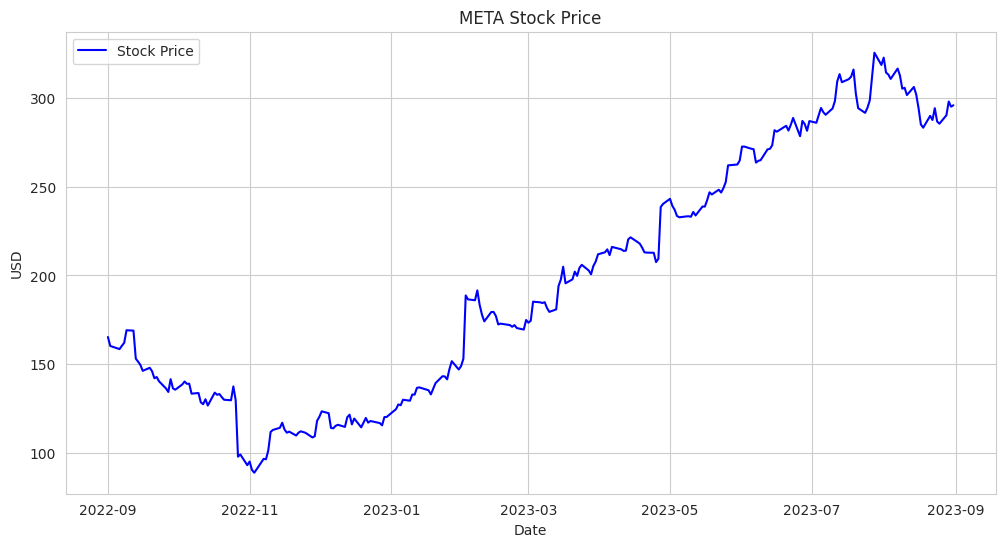

In [3]:
import matplotlib.pyplot as plt

stock = yf.Ticker(symbol)
hist_plt = stock.history(
    start=datetime.date(2022, 9, 1).strftime("%Y-%m-%d"),
    end=datetime.date(2023, 9, 1).strftime("%Y-%m-%d"),
)
close_price = hist_plt["Close"]

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(close_price.index, close_price.values, label="Stock Price", color="blue")
plt.xlabel("Date")
plt.ylabel("USD")
plt.title(f"{symbol} Stock Price")
plt.legend()
plt.grid(True)
plt.show()

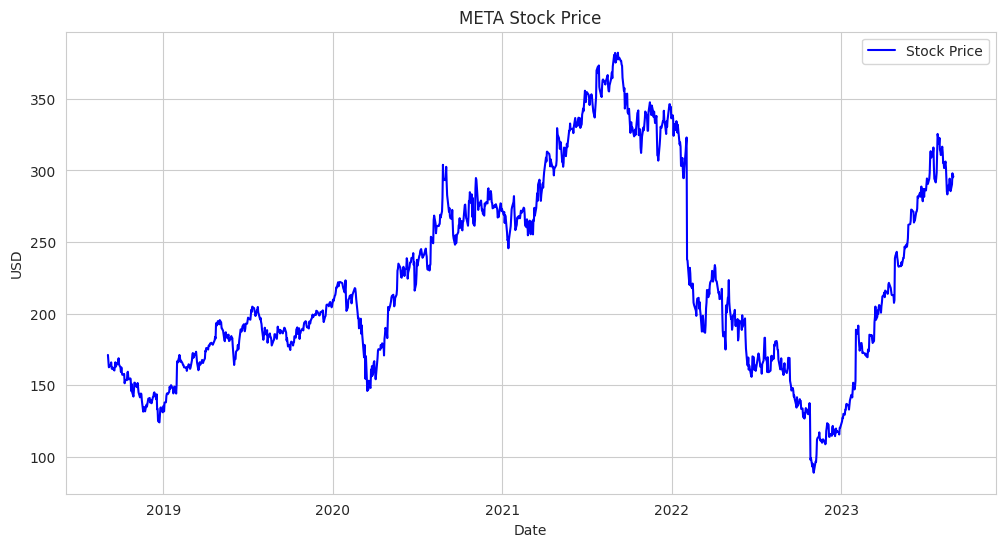

In [4]:
stock = yf.Ticker(symbol)
hist_plt = stock.history(
    start=datetime.date(2018, 9, 1).strftime("%Y-%m-%d"),
    end=datetime.date(2023, 9, 1).strftime("%Y-%m-%d"),
)
close_price = hist_plt["Close"]

plt.figure(figsize=(12, 6))
plt.plot(close_price.index, close_price.values, label="Stock Price", color="blue")
sns.set_style("whitegrid")
plt.xlabel("Date")
plt.ylabel("USD")
plt.title(f"{symbol} Stock Price")
plt.legend()
plt.grid(True)
plt.show()

## Įsivaizduokite, kad 2022-09-01 į akciją investavote 5000 eurų, o kitus 5000 eurų investavote į obligaciją, kuri per metus išmokėjo 250 eurų palūkanų. Paskaičiuokite, kokia jūsų portfelio grąža. (2 balai)


In [5]:
stock_amount_start = 5000
stock_amount_final = stock_amount_start / price_start * price_end

bond_amount_start = 5000
bond_amount_final = 5000 + 250

total_investment = stock_amount_start + bond_amount_start
total_final = stock_amount_final + bond_amount_final
total_change = total_final - total_investment
total_return = total_change / total_investment * 100

print(f"Final bond amount: {bond_amount_final:.2f} USD")
print(f"Final stock amount: {stock_amount_final:.2f} USD")
print(f"Final total: {total_final:.2f} USD")
print(f"Total change: {total_change:.2f} USD")
print(f"Total return: {total_return:.2f} %")

Final bond amount: 5250.00 USD
Final stock amount: 8961.66 USD
Final total: 14211.66 USD
Total change: 4211.66 USD
Total return: 42.12 %


## Paimkite akcijos kainas penkiems ir paskaičiuoti kiekvienų metų grąžą rugsėjo 1 dienai. (1 balas)


In [6]:
start_year = 2019
years = 5

results = []

for i in range(years):
    price_start, str_start_date = get_price(
        datetime.date(start_year + i - 1, 9, 1), hist
    )
    price_end, str_end_date = get_price(datetime.date(start_year + i, 9, 1), hist)

    stock_change = price_end - price_start
    stock_return = stock_change / price_start * 100

    results.append(
        {
            "Start Date": str_start_date,
            "End Date": str_end_date,
            "Start Price": f"{price_start:.2f} USD",
            "End Price": f"{price_end:.2f} USD",
            "Stock Change": f"{stock_change:.2f} USD",
            "Stock Return": f"{stock_return:.2f} %",
        }
    )

pd.DataFrame(results)

,Start Date,End Date,Start Price,End Price,Stock Change,Stock Return
0,2018-09-04,2019-09-03,171.16 USD,182.39 USD,11.23 USD,6.56 %
1,2019-09-03,2020-09-01,182.39 USD,295.44 USD,113.05 USD,61.98 %
2,2020-09-01,2021-09-01,295.44 USD,382.05 USD,86.61 USD,29.32 %
3,2021-09-01,2022-09-01,382.05 USD,165.36 USD,-216.69 USD,-56.72 %
4,2022-09-01,2023-09-01,165.36 USD,296.38 USD,131.02 USD,79.23 %


## Last task

Išspręskite uždavinį: Verslininkas 2018 metais galėjo nusipirkti reikiamą prekę už 50000 eurų tuo metu, bet jis pasirinko pirkti prekę išsimokėtinai ir mokėti dalimis. Iš karto sumokėjo 20000 eurų, po metų sumokėjo 12500 eurų, po dar vienų metų sumokėjo 10000 eurų, po trečių metų sumokėjo 7500 eurų, po ketvirtų ir penktų dar po 5000 eurų. Po pirmos 20000 eurų įmokos, likusius pinigus suinvestavo į jums skirtą akciją, po metų pardavė įsigytos akcijos už 12500 eurų, kad galėtų atlikti mokėjimą ir t.t. Paskaičiuokite, ar verslininkas dėl to sutaupė pinigų, ar geriau būtų iš karto mokėjęs už prekę. (5 balai)


In [7]:
cost = 50000
initial_payment = 20000
initial_investment = cost - initial_payment

payment_years = [2019, 2020, 2021, 2022, 2023]
payments = [12500, 10000, 7500, 5000, 5000]

current_capital = initial_investment

initial_buy_date = datetime.date(payment_years[0] - 1, 9, 1)
initial_price, _ = get_price(initial_buy_date, hist)
current_stock_count = current_capital / initial_price

results = []

for i in range(5):
    start_date = datetime.date(payment_years[i] - 1, 9, 1)
    end_date = datetime.date(payment_years[i], 9, 1)

    start_price, actual_start_price_date = get_price(start_date, hist)
    end_price, actual_end_price_date = get_price(end_date, hist)

    portfolio_value_after_year = current_stock_count * end_price
    stock_count_after_payment = current_stock_count - (payments[i] / end_price)
    portfolio_value_after_payment = stock_count_after_payment * end_price

    results.append(
        {
            "Buy Date": actual_start_price_date,
            "Sell Date": actual_end_price_date,
            "Buy Price": f"{start_price:.2f} USD",
            "Sell Price": f"{end_price:.2f} USD",
            "Stock Count (Current)": f"{current_stock_count:.2f}",
            "Stock Count (After Payment)": f"{stock_count_after_payment:.2f}",
            "Portfolio Value (Current)": f"{current_capital:.2f} USD",
            "Portfolio Value (After A Year)": f"{portfolio_value_after_year:.2f} USD",
            "Portfolio Value (After Payment)": f"{portfolio_value_after_payment:.2f} USD",
            "Payment": f"{payments[i]:.2f} USD",
        }
    )

    current_capital = portfolio_value_after_payment
    current_stock_count = stock_count_after_payment

    if portfolio_value_after_payment < 0:
        break


pd.DataFrame(results)

,Buy Date,Sell Date,Buy Price,Sell Price,Stock Count (Current),Stock Count (After Payment),Portfolio Value (Current),Portfolio Value (After A Year),Portfolio Value (After Payment),Payment
0,2018-09-04,2019-09-03,171.16 USD,182.39 USD,175.27,106.74,30000.00 USD,31968.33 USD,19468.33 USD,12500.00 USD
1,2019-09-03,2020-09-01,182.39 USD,295.44 USD,106.74,72.89,19468.33 USD,31535.31 USD,21535.31 USD,10000.00 USD
2,2020-09-01,2021-09-01,295.44 USD,382.05 USD,72.89,53.26,21535.31 USD,27848.51 USD,20348.51 USD,7500.00 USD
3,2021-09-01,2022-09-01,382.05 USD,165.36 USD,53.26,23.02,20348.51 USD,8807.30 USD,3807.30 USD,5000.00 USD
4,2022-09-01,2023-09-01,165.36 USD,296.38 USD,23.02,6.15,3807.30 USD,6823.95 USD,1823.95 USD,5000.00 USD
